In [11]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
import numpy

In [12]:
df = pd.read_csv('heart failure.csv')

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [15]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
x = df.drop('death',axis=1)

In [18]:
y = df['death']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

# Apply Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dt = DecisionTreeClassifier()

In [23]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [24]:
pred = dt.predict(xtest)

In [25]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [26]:
pred 

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [27]:
import numpy as np
np.array(ytest)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [28]:
dt.score(xtest,ytest)

0.6666666666666666

# Evaluate the ML model

In [29]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [30]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.68      0.83      0.75        53\n           1       0.64      0.43      0.52        37\n\n    accuracy                           0.67        90\n   macro avg       0.66      0.63      0.63        90\nweighted avg       0.66      0.67      0.65        90\n'

In [31]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        53
           1       0.64      0.43      0.52        37

    accuracy                           0.67        90
   macro avg       0.66      0.63      0.63        90
weighted avg       0.66      0.67      0.65        90



In [32]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [33]:
test_confusion_matrix

array([[44,  9],
       [21, 16]], dtype=int64)

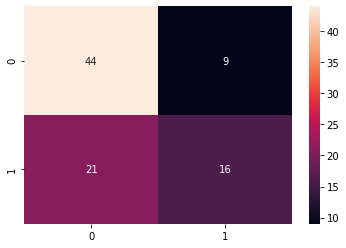

In [34]:
sns.heatmap(test_confusion_matrix, annot=True)

In [35]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [36]:
dt.score(xtest,ytest)

0.6666666666666666

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
clf = RandomForestClassifier()

In [39]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [40]:
clf.score(xtest, ytest)

0.7777777777777778

# Hyper Parameter Tuning: Randomized search CV

In [54]:
trees = np.random.randint(25,200,25)
criterion = ['gini','entropy']
max_depth = np.random.randint(1,15,20)
min_samples_split = [2,3,4]
max_features = ['sqrt', 'log2']

In [55]:
#grids
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
} 

In [56]:
print(ids)

{'n_estimators': array([ 98,  93,  81,  49, 197,  85,  54, 108,  98,  33, 185, 193, 112,
       170, 180,  41,  74, 155, 156,  34, 114,  90,  37,  28, 125]), 'criterion': ['gini', 'entropy'], 'max_depth': array([ 2,  1, 10,  5, 14,  2,  8,  2, 14, 13, 14,  9,  5,  7,  5,  3,  8,
        3, 12,  2]), 'min_samples_split': [2, 3, 4], 'max_features': ['sqrt', 'log2']}


In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
rcv = RandomizedSearchCV(clf , ids, n_iter = 200, cv=3)

In [59]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  1, 10,  5, 14,  2,  8,  2, 14, 13, 14,  9,  5,  7,  5,  3,  8,
        3, 12,  2]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([ 98,  93,  81,  49, 197,  85,  54, 108,  98,  33, 185, 193, 112,
       170, 180,  41,  74, 155, 156,  34, 114,  90,  37,  28, 125])})

In [60]:
rcv.cv_results_

{'mean_fit_time': array([0.1990424 , 0.03956477, 0.12914213, 0.10437171, 0.04601145,
        0.03724122, 0.08824913, 0.19368259, 0.04565938, 0.20831617,
        0.06092509, 0.06197206, 0.11255582, 0.1272254 , 0.21854361,
        0.10408028, 0.2160782 , 0.11437511, 0.10652375, 0.05624572,
        0.11189445, 0.06656114, 0.21867228, 0.12873713, 0.12313835,
        0.11233417, 0.09171708, 0.04300086, 0.02778085, 0.21705659,
        0.04025499, 0.09995953, 0.0925076 , 0.04109009, 0.05732656,
        0.17774304, 0.21953042, 0.21499944, 0.18649673, 0.13281767,
        0.03457538, 0.1733249 , 0.08244586, 0.10503928, 0.04587738,
        0.12650506, 0.20130618, 0.1276269 , 0.08975951, 0.0402259 ,
        0.10057807, 0.04122718, 0.04921492, 0.09687297, 0.09275206,
        0.21467209, 0.08698432, 0.11305753, 0.10348916, 0.0906051 ,
        0.08642324, 0.17490363, 0.09790897, 0.04056048, 0.04006426,
        0.21920673, 0.10006475, 0.08397524, 0.21330643, 0.10595942,
        0.14328448, 0.11434762,

In [61]:
cv_result = pd.DataFrame(rcv.cv_results_)

In [62]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.199042,0.003952,0.012962,0.002139,185,3,log2,7,entropy,"{'n_estimators': 185, 'min_samples_split': 3, ...",0.828571,0.928571,0.855072,0.870738,0.042301,47
1,0.039565,0.001932,0.004235,0.000860,37,3,sqrt,2,gini,"{'n_estimators': 37, 'min_samples_split': 3, '...",0.828571,0.900000,0.811594,0.846722,0.038306,174
2,0.129142,0.005703,0.009174,0.001109,114,2,log2,14,entropy,"{'n_estimators': 114, 'min_samples_split': 2, ...",0.828571,0.942857,0.840580,0.870669,0.051279,72
3,0.104372,0.003861,0.006754,0.000962,98,2,log2,7,gini,"{'n_estimators': 98, 'min_samples_split': 2, '...",0.800000,0.928571,0.869565,0.866046,0.052548,85
4,0.046011,0.002017,0.002037,0.001890,41,2,log2,7,gini,"{'n_estimators': 41, 'min_samples_split': 2, '...",0.842857,0.885714,0.826087,0.851553,0.025107,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.198886,0.007392,0.015637,0.000019,180,2,log2,5,entropy,"{'n_estimators': 180, 'min_samples_split': 2, ...",0.800000,0.957143,0.855072,0.870738,0.065103,47
196,0.036620,0.010208,0.005207,0.007364,33,3,log2,2,entropy,"{'n_estimators': 33, 'min_samples_split': 3, '...",0.828571,0.814286,0.782609,0.808489,0.019207,191
197,0.226870,0.006410,0.015420,0.004747,197,4,log2,13,entropy,"{'n_estimators': 197, 'min_samples_split': 4, ...",0.800000,0.942857,0.855072,0.865977,0.058829,93
198,0.076759,0.002635,0.010413,0.007363,74,2,sqrt,8,gini,"{'n_estimators': 74, 'min_samples_split': 2, '...",0.814286,0.942857,0.855072,0.870738,0.053645,47


In [63]:
rcv.best_score_

0.8898550724637682

In [64]:
rcv.best_params_

{'n_estimators': 155,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'entropy'}

# Hyper Parameter Tuning: Grid search CV

In [53]:
from sklearn.model_selection import GridSearchCV

In [65]:
gsc = GridSearchCV (clf , ids,cv=3)

In [66]:
gsc.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  1, 10,  5, 14,  2,  8,  2, 14, 13, 14,  9,  5,  7,  5,  3,  8,
        3, 12,  2]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([ 98,  93,  81,  49, 197,  85,  54, 108,  98,  33, 185, 193, 112,
       170, 180,  41,  74, 155, 156,  34, 114,  90,  37,  28, 125])})

In [67]:
gsc.cv_results_

{'mean_fit_time': array([0.10888791, 0.0983355 , 0.08467484, ..., 0.03343733, 0.03661982,
        0.12832085]),
 'std_fit_time': array([0.02073659, 0.00532355, 0.00439307, ..., 0.00307586, 0.00724888,
        0.0100392 ]),
 'mean_score_time': array([0.01126345, 0.00829228, 0.00825596, ..., 0.00838796, 0.        ,
        0.01308393]),
 'std_score_time': array([0.00803203, 0.00021766, 0.00106122, ..., 0.00642923, 0.        ,
        0.00358821]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 2, 2, ..., 2, 2, 2],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'log2', 'log2', 'log2'],
              mask=[False, Fa

In [68]:
cv_result = pd.DataFrame(gsc.cv_results_)

In [69]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.108888,0.020737,0.011263,0.008032,gini,2,sqrt,2,98,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.814286,0.957143,0.811594,0.861008,0.067987,3812
1,0.098336,0.005324,0.008292,0.000218,gini,2,sqrt,2,93,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.771429,0.871429,0.855072,0.832643,0.043797,5292
2,0.084675,0.004393,0.008256,0.001061,gini,2,sqrt,2,81,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.800000,0.914286,0.826087,0.846791,0.048900,4818
3,0.058142,0.008748,0.003325,0.002488,gini,2,sqrt,2,49,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.828571,0.828571,0.840580,0.832574,0.005661,5301
4,0.207997,0.006141,0.012943,0.003819,gini,2,sqrt,2,197,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.828571,0.914286,0.826087,0.856315,0.041004,4197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.125370,0.000002,0.003170,0.004483,entropy,2,log2,4,114,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.771429,0.900000,0.826087,0.832505,0.052685,5322
5996,0.097916,0.002989,0.007401,0.006423,entropy,2,log2,4,90,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.828571,0.857143,0.826087,0.837267,0.014091,5194
5997,0.033437,0.003076,0.008388,0.006429,entropy,2,log2,4,37,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.800000,0.928571,0.797101,0.841891,0.061304,5122
5998,0.036620,0.007249,0.000000,0.000000,entropy,2,log2,4,28,"{'criterion': 'entropy', 'max_depth': 2, 'max_...",0.771429,0.828571,0.855072,0.818357,0.034903,5573


In [70]:
gsc.best_estimator_

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_split=3,
                       n_estimators=37)

In [71]:
gsc.best_score_

0.8946859903381643

In [72]:
gsc.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 37}